In [11]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [69]:
# Get project files
#!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

#!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 32
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [84]:
# 3
train_image_generator = ImageDataGenerator(rescale = 1./255)
validation_image_generator = ImageDataGenerator(rescale = 1./255)
test_image_generator = ImageDataGenerator(rescale = 1./255)

train_data_gen = train_image_generator.flow_from_directory(directory=train_dir, target_size = (IMG_HEIGHT, IMG_WIDTH), batch_size=batch_size)
val_data_gen = validation_image_generator.flow_from_directory(directory=validation_dir, target_size = (IMG_HEIGHT, IMG_WIDTH), batch_size=batch_size,class_mode='sparse')
test_data_gen = test_image_generator.flow_from_directory(directory=test_dir, target_size = (IMG_HEIGHT, IMG_WIDTH), batch_size=50,shuffle=False,classes=['.'])

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


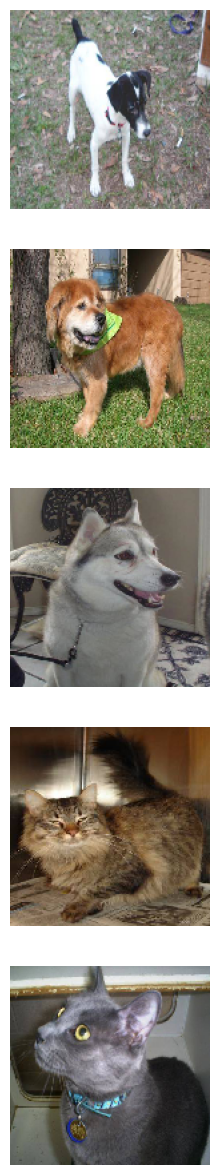

In [41]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [65]:
# 5
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    height_shift_range=0.1,
    width_shift_range=0.1,
    brightness_range=(0.5,1.5),
    zoom_range = [1, 1.5],
)


Found 2000 images belonging to 2 classes.


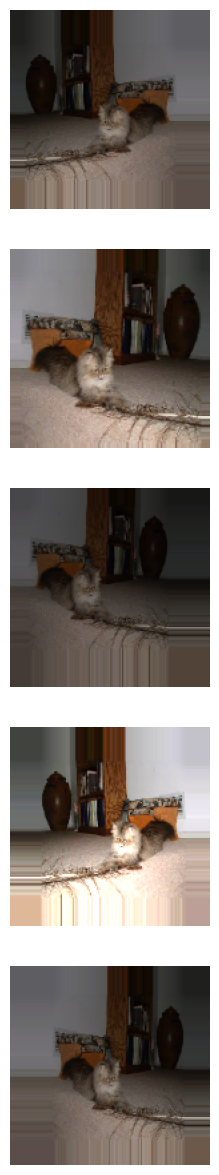

In [66]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='sparse')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [67]:
# 7
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape = (IMG_HEIGHT,IMG_WIDTH,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation = 'softmax'))

model.summary()


model.compile(optimizer='adam', 

loss='sparse_categorical_crossentropy',

metrics=['accuracy'])

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 34, 34, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 73984)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │       4,735,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,791,490 (18.28 MB)

 Trainable params: 4,791,490 (18.28 MB)

 Non-trainable params: 0 (0.00 B)

In [70]:
# 8
history = model.fit(
    train_data_gen,  # Training data
    steps_per_epoch=train_data_gen.samples // train_data_gen.batch_size,
    validation_data=val_data_gen,  # Validation data
    validation_steps=val_data_gen.samples // val_data_gen.batch_size,
    epochs=epochs  # Set to the desired number of epochs
)

Epoch 1/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.6912 - loss: 0.5725 - val_accuracy: 0.6562 - val_loss: 0.6038
Epoch 2/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.6094 - loss: 0.6240 - val_accuracy: 0.6538 - val_loss: 0.6054
Epoch 3/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.6852 - loss: 0.5866 - val_accuracy: 0.6719 - val_loss: 0.5994
Epoch 4/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.6797 - loss: 0.5724 - val_accuracy: 0.6827 - val_loss: 0.5696
Epoch 5/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.7137 - loss: 0.5591 - val_accuracy: 0.7054 - val_loss: 0.5640
Epoch 6/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7188 - loss: 0.5394 - val_accuracy: 0.7500 - val_loss: 0.5003
Epoch 7/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.7142 - loss: 0.5514 - val_accuracy: 0.6853 - val_loss: 0.5964
Epoch 8/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7266 - loss: 0.5807 - val_accuracy: 0.6538 - val_l

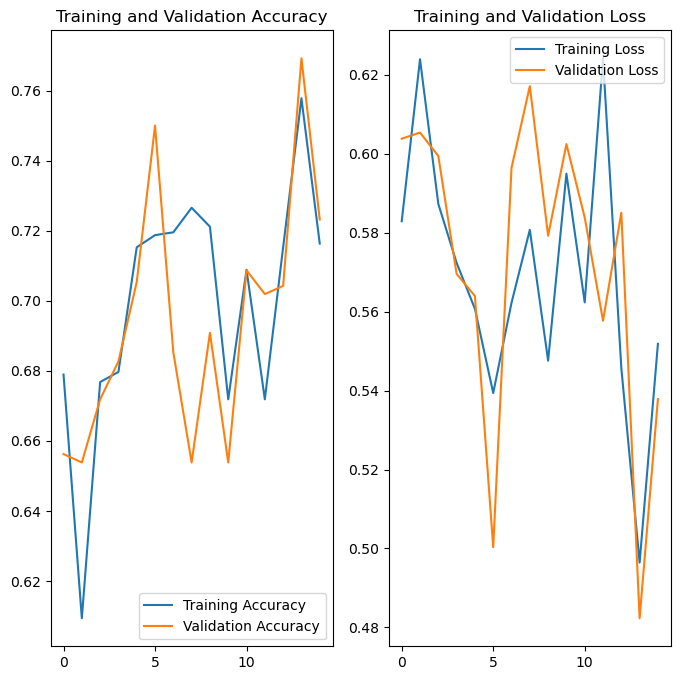

In [71]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [117]:
predict = model.predict(test_data_gen)
probabilities = [predict[i, 1] for i in range(len(predict))]  # assuming '1' corresponds to 'dog'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


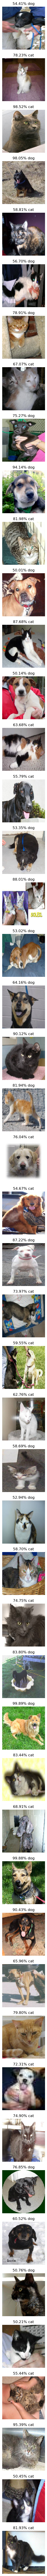

In [118]:
test_img, _ = next(test_data_gen)
plotImages(test_img, probabilities)

In [119]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 70.0% of the images of cats and dogs.
You passed the challenge!
